# **Tarea Métodos Computacionales**
Por: Juan Esteban Ospina Holguín y Mariana Toro Escobar


In [ ]:
#Este notebook permite analizar los errores en la computación.
#Librerias 
import math as mt
import numpy as np
import matplotlib.pylab as plt 
from random import randint

## Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

- 
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1} 
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función 
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página 
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)


In [27]:
"""Este código permite realizar el cálculo de las tres series"""

# Definición de las series como funciones
def S1(n):
  sumS1 = 0 # Iniciar la sumatoria
  for i in range(1,n): # Definir el numerador y el denominador
    num = ((-1)**i)*i
    den = (i+1)
    sumS1 += num/den
  return sumS1

def S2(n):
  suma1 = 0 # Iniciar la sumatoria para las dos componentes de la serie
  suma2 = 0
  for i in range (1,n): # Cálculo en un mismo ciclo de las dos series que componen la serie 2 
    num1 = -(2*i-1) # Definir el numerador y el denominador de la primer serie
    den1 = (2*i)
    num2 = 2 * i # Definir el numerador y el denominador de la segunda serie
    den2 = 2 * i + 1
    suma1 += num1/den1
    suma2 += num2/den2
  sumS2 = suma1 + suma2
  return sumS2

def S3(n):
  sumS3 = 0 # Iniciar la sumatoria
  for i in range(1,n): # Definir el numerador y el denominador
    sumS3 += 1 / (2*i*(2*i+1))
  return sumS3

Figura 1.


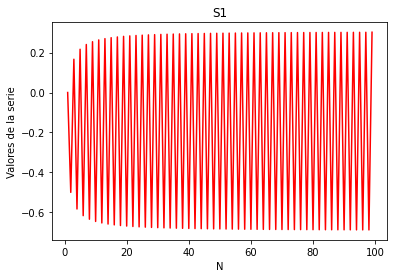

La serie 1 diverge
Figura 2.


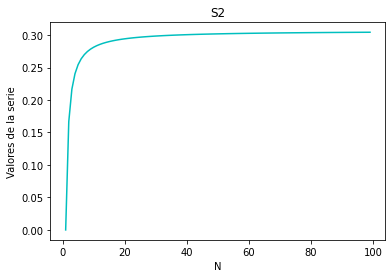

La serie 2 converge
Figura 3.


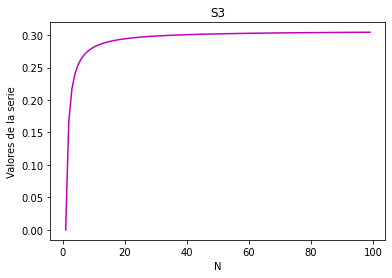

La serie 3 converge


In [28]:
"""Este código permite estudiar la convergencia de las tres series"""

# Definición del arreglo para evaluar los 100 primeros valores de las series
N = 100 # n-ésimo término hasta el cual se desea calcular las series
Nesimo = np.arange(1,N,1)

# Valores que adquieren las series hasta tal n-ésimo término
s1 = [] 
for i in Nesimo:
  val1 = S1(i)
  s1.append(val1) # Crear la lista en que se almacenan los primeros 100 valores de la serie

s2 = [] 
for i in Nesimo:
  val2 = S2(i)
  s2.append(val2) # Crear la lista en que se almacenan los primeros 100 valores de la serie

s3 = []
for i in Nesimo:
  val3 = S3(i)
  s3.append(val3) # Crear la lista en que se almacenan los primeros 100 valores de la serie

# Gráficos de las series
print("Figura 1.")
plt.figure()
plt.plot(Nesimo,s1,color="r")
plt.title("S1")
plt.xlabel("N")
plt.ylabel("Valores de la serie")
plt.show()
print("La serie 1 diverge")

print("Figura 2.")
plt.figure()
plt.plot(Nesimo,s2,color="c")
plt.title("S2")
plt.xlabel("N")
plt.ylabel("Valores de la serie")
plt.show()
print("La serie 2 converge")

print("Figura 3.")
plt.figure()
plt.plot(Nesimo,s3,color="m")
plt.title("S3")
plt.xlabel("N")
plt.ylabel("Valores de la serie")
plt.show()
print("La serie 3 converge")

Figura 4.


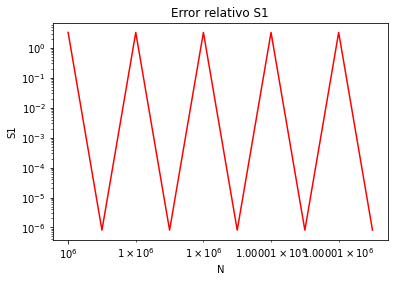

Figura 5.


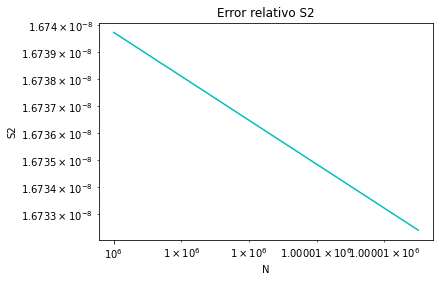

In [29]:
"""Este código permite representar el error relativo en función del número de términos de las series"""

# Arreglo de los valores del error en escala logarítmica
intervalo = np.arange(1000000,1000010,1)

# Cálculo del error relativo para las series 1 y 2 con respecto a la 3
Error13 = []
for i in intervalo:
  E13 = np.fabs(S1(i)-S3(i))/S3(i) # Definir la ecuación que permite hallar el error relativo considerando el valor aproximado S1 y el real S3
  Error13.append(E13)

Error23 = []
for i in intervalo:
  E23 = np.fabs(S2(i)-S3(i))/S3(i) # Definir la ecuación que permite hallar el error relativo considerando el valor aproximado S2 y el real S3
  Error23.append(E23)

# Gráficos en el intervalo de los errores relativos
print("Figura 4.")
plt.figure()
plt.title("Error relativo S1")
plt.loglog(intervalo,Error13,color="r")
plt.xlabel("N")
plt.ylabel("S1")
plt.show()

print("Figura 5.")
plt.figure()
plt.title("Error relativo S2")
plt.loglog(intervalo,Error23,color="c")
plt.xlabel("N")
plt.ylabel("S2")
plt.show()

 **Análisis y discusión de resultados:** 
 
Una vez se logra determinar la convergencia para las series S2 y S3 de los ejercicios planteados puesto que, en las *Figuras 2 y 3.* se hace notoria la tendencia de las series a un valor puntual, se puede concluir que al incluir mayor cantidad de términos en el proceso de análisis, se disminuye el error algorítmico para tales series (en especial las de potencia) como se pone en evidencia en la *Figura 5.* con la serie S2, de modo que aumentar el valor de N permite lograr una mejor aproximación de los resultados. De forma homóloga, puede puntualizarse entonces que el decrecimiento del error algorítmico para grandes valores de N indica la convergencia del algoritmo, y para lograr un análisis más completo de los datos podría tenerse en cuenta otro tipo de errores como el de redondeo.

Por otro lado, el error relativo de la serie S3 oscila entre un intervalo de valores independientemente de la cantidad de términos que se incluyan en el análisis, tal cual se representa en la *Figura 5.*, es decir que, si bien el N puede crecer, al tratarse de una serie alternante que diverge según la obtención de valores dispersos para la serie que no tienden a regularizarse en la *Figura 1.*, el error no disminuye.

## **Errores de redondeo**. Caos numérico en un mapa logístico y errores de punto flotante (Errores de redondeo)

> Un ejemplo clásico de caos,  es el comportamiento no lineal en las interaciones de un mapa logistico 

\begin{equation}
x_{n+1}=f(x_n)=rx_n(1-x_n)
\end{equation}

> con $x\in (0,1)$ y $r\in(0,4)$ se pueden producir varios comportamientos sorprendentes.


> ### Problema: 
Encontrar tres formas diferentes de expresar $f(x)$  y calcular la evolución de la misma condición inicial después de cientos de iteraciones. Para este problema, será extremadamente útil  ver sus resultados gráficamente; construya listas de números y llame la libreria matplotlib. 


>#### Hint: valores numéricos de r y x0 que puede tomar:


```python
    >>> r = [1.9, 2.9, 3.1, 3.5, 3.9]

    >>> x0 = 0.6 # any number in [0,1] will do here

    >>> numpoints = 100
       ```
       

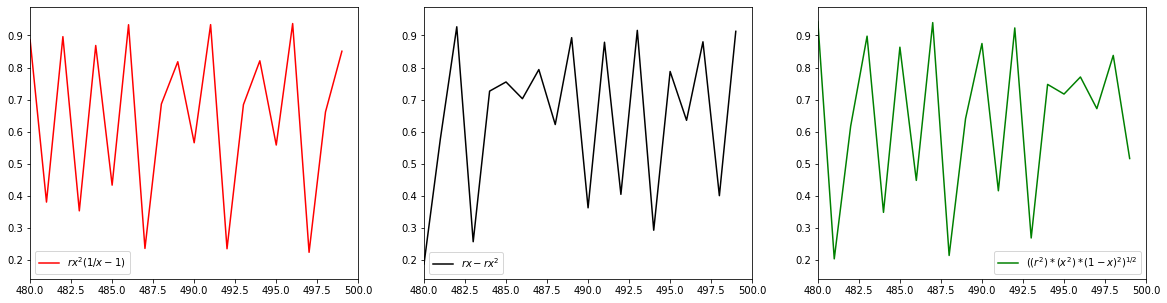

In [25]:
#condiciones iniciales
xi = 0.2 # población inicial
r  = 3.8 # tasa de creciemiento
Ntiempos = 500 #número de etapas para la población 
N = np.arange(0, Ntiempos, 1) # grilla de evaluación
d = 20 #intervalos a mostrar

#Funcion de población escrita de 3 formas diferentes
def f1(x, r):#función de población 1
  x = r * x**2 * (1/x - 1)
  return x

def f2(x, r):#función de población 2
  x = r * x - r * x**2
  return x

def f3(x, r):#función de población 3
  x = np.sqrt((r**2)*(x**2)*(1-x)**2)
  return x

def mapa_logistico(xi, r, Ntiempos,F):
  """
  Construye un array con la poblacion para un numero Ntiempos definido.
    xi: Poblacion inicial  
    r: tasa de crecimiento.
  Output
    poblacion_: Array con la Poblacion final
    """
  f = F
  poblacion_ = np.zeros(Ntiempos)
  for i in range(0, Ntiempos):
    xn = f(xi, r)
    xi = xn
    poblacion_[i] = xn
  return poblacion_ 
  
plt.figure(figsize=(20,5))#Tamaño de la figura
p1 = mapa_logistico(xi, r, Ntiempos,f1)#se calcula la población para la función 1
plt.subplot(131)# Figura con una fila y tres columnas, activo primer subgráfico
plt.plot(N, p1, color = 'red', label = '$rx^2(1/x - 1)$') #se grafican los resultado para f1
plt.xlim(Ntiempos-d,Ntiempos)
plt.legend()#etiqueta


p2 = mapa_logistico(xi, r, Ntiempos,f2)#se calcula la población para la función 2
plt.subplot(132)# Figura con una fila y tres columnas, activo segundo subgráfico
plt.plot(N, p2,color = 'black', label = '$rx - rx^2$') #se grafican los resultado para f2
plt.xlim(Ntiempos-d,Ntiempos)
plt.legend()#etiqueta

p3 = mapa_logistico(xi, r, Ntiempos,f3)#se calcula la población para la función 3
plt.subplot(133)# Figura con una fila y tres columnas, activo tercer subgráfico
plt.plot(N, p3,color = 'green',label = '$((r^2)*(x^2)*(1-x)^2)^{1/2}$') #se grafican los resultado para f3
plt.xlim(Ntiempos-d,Ntiempos)
plt.legend()#etiqueta

Como vemos, las graficas para N grandes no coinciden. Esto ocurre al cambiar la estructura de la función, pero en esencia es la misma

100%|██████████| 1100/1100 [00:06<00:00, 173.97it/s]


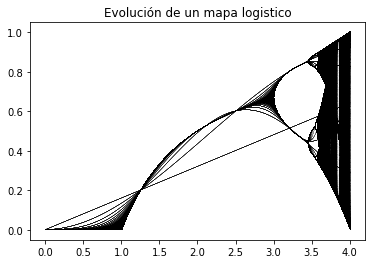

In [26]:
"""Anexo"""
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

x0 = 0.2  # Valor inicial
def LogisticMap(x):
    r = np.arange(0, 4, 0.0001)
    iters = 1000  # Número de iteraciones sin salida
    last = 100  # Finalmente dibuje el número de iteraciones del resultado
    for i in tqdm(range(iters+last)):
        x = r * x - r* x**2
        #if i >= iters:
        plt.plot(r, x, ',k', alpha=0.01)  # alphaSet transparencia
    plt.title('Evolución de un mapa logistico')
    plt.show()


LogisticMap(xi)

#Evolución del mapa logistico en donde se verifica la condición de convergencia o divergencia en función de  r